# Notebook 04 – Visualization

In this notebook, we demonstrate how visualizations can be generated from the 
Array of Things (AoT) sensor data. 

We use a combination of:
- **Waggle plotting utilities** (e.g., `gen_custom_plots.py`, `create_project_graphs.sh`)  
- **Custom scripts** (`gen_tables.py`, `gen_digest_plots.py`)  
- And **final curated figures** prepared for our research paper.  

⚠️ Note: Some Waggle plotting tools depend on additional packages not included 
in this repo. We show example usage (commented code) and then display the 
example output plots directly.


In [4]:
#Imports needed

import os
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

## 1. Example: Custom plotting with Waggle tools

The Waggle framework provides scripts such as `gen_custom_plots.py` which can 
generate node-specific time series visualizations.

Below we show the general usage (commented out since paths may vary).

In [5]:
# import subprocess

# Example command (commented since external dependencies may be missing):
# subprocess.run([
#     "python", "../scripts/plots/gen_custom_plots.py",
#     "--input", "../data/aggregated/sample_aggregated_1hour.csv",
#     "--output", "../figures/sample_custom_plot.png"
# ])

# Instead of running, we display a provided example plot below.

### Example Output (Waggle plotting tool)

The following figure (`example.png`) was generated using Waggle’s 
`gen_custom_plots.py`. It shows temperature trends from a single AoT node 
over a day, highlighting how raw sensor streams can be visualized directly.

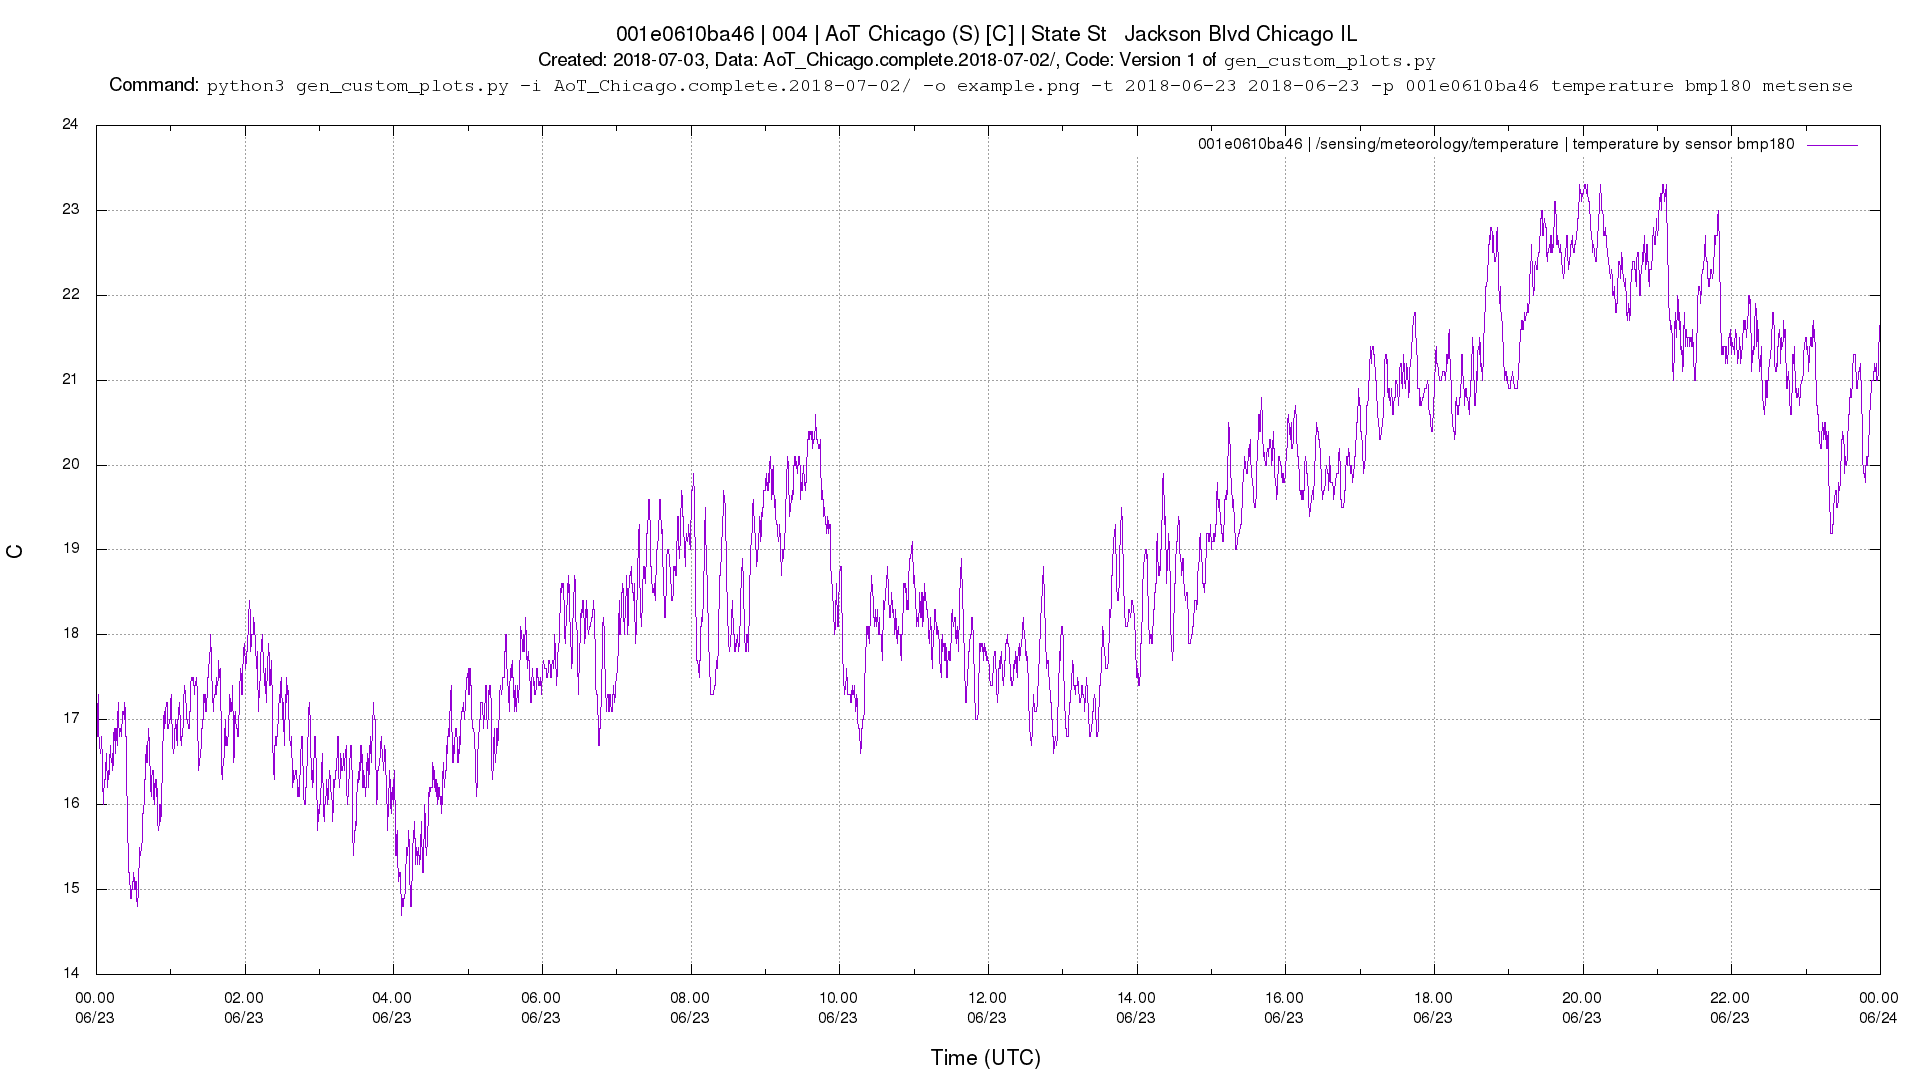

In [6]:
from IPython.display import Image
Image(filename="../figures/example.png")

### Example: Generating Plots Directly from Aggregated Data  

While the final figures in this notebook were refined and curated for the research paper,  
the following sample code demonstrates how one could generate similar visualizations  
directly from the aggregated AoT dataset.  

These examples include:  
- **Line plots of pollutant concentrations** over time.  
- **Feature importance estimates** (using variance as a simple heuristic).  
- **Confusion matrix illustrations** based on pollutant thresholds.  

The code is fully data-driven and uses only the provided CSVs,  
so it can be adapted by others who wish to explore the dataset further.

In [9]:
# ---------------------------------------------------------------
# Example plotting code using the aggregated AoT dataset
# Note: This shows how figures *could* be generated from the data.
# In practice, the final figures included below were curated
# and refined for the research paper.
# ---------------------------------------------------------------

#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np

# --- Load aggregated dataset (e.g., 1-hour data) ---
# df = pd.read_csv("../data/aggregated/sample_aggregated_1hour.csv")

# --- Example 1: Average pollutant concentrations over time ---
# pollutants = ["co", "no2", "so2"]
# df_pollutants = df[df["parameter"] == "concentration"]
# df_subset = df_pollutants[df_pollutants["sensor"].isin(pollutants)]
# avg_pollutants = df_subset.groupby(["timestamp", "sensor"])["value_hrf"].mean().reset_index()

# plt.figure(figsize=(10, 4))
# sns.lineplot(data=avg_pollutants, x="timestamp", y="value_hrf", hue="sensor")
# plt.title("Average Pollutant Concentrations Over Time")
# plt.xticks(rotation=30)
# plt.ylabel("Concentration (a.u.)")
# plt.tight_layout()
# plt.show()


# --- Example 2: Feature Importance via simple variance heuristic ---
# (Real models could replace this; here we compute relative variance contribution)
# feature_stats = df.groupby("sensor")["value_hrf"].var().dropna()
# feature_importance = feature_stats / feature_stats.sum()

# feature_importance.sort_values(ascending=True).plot.barh(
#     color="skyblue", hatch="//", figsize=(7,4)
# )
# plt.xlabel("Relative Importance (variance ratio)")
# plt.title("Feature Importance (heuristic from variance)")
# plt.tight_layout()
# plt.show()


# --- Example 3: Confusion Matrix style illustration ---
# (For demo, we bin pollutant levels into AQI categories, then compare two "methods")
# bins = [-np.inf, 50, 100, 150, 200, np.inf]
# labels = ["Good", "Moderate", "Unhealthy", "Very Unhealthy", "Hazardous"]

# # Rule-based annotation
# df_subset["rule_label"] = pd.cut(df_subset["value_hrf"], bins=bins, labels=labels)

# # Simulated "predicted" label (here we jitter values as if another method was used)
# df_subset["pred_label"] = pd.cut(df_subset["value_hrf"] * np.random.uniform(0.9,1.1,len(df_subset)),
#                                  bins=bins, labels=labels)

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(df_subset["rule_label"], df_subset["pred_label"], labels=labels, normalize="true")*100

# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues", xticklabels=labels, yticklabels=labels)
# plt.xlabel("Predicted AQI label")
# plt.ylabel("Rule-based annotation")
# plt.title("Confusion Matrix Example (from data)")
# plt.show()

## 2. Final Figures for Research Paper

The final results reported in our paper used a combination of Waggle plots 
and refined matplotlib/seaborn visualizations. These figures summarize 
classification performance, feature importance, and agreement between 
rule-based and LLM annotations.

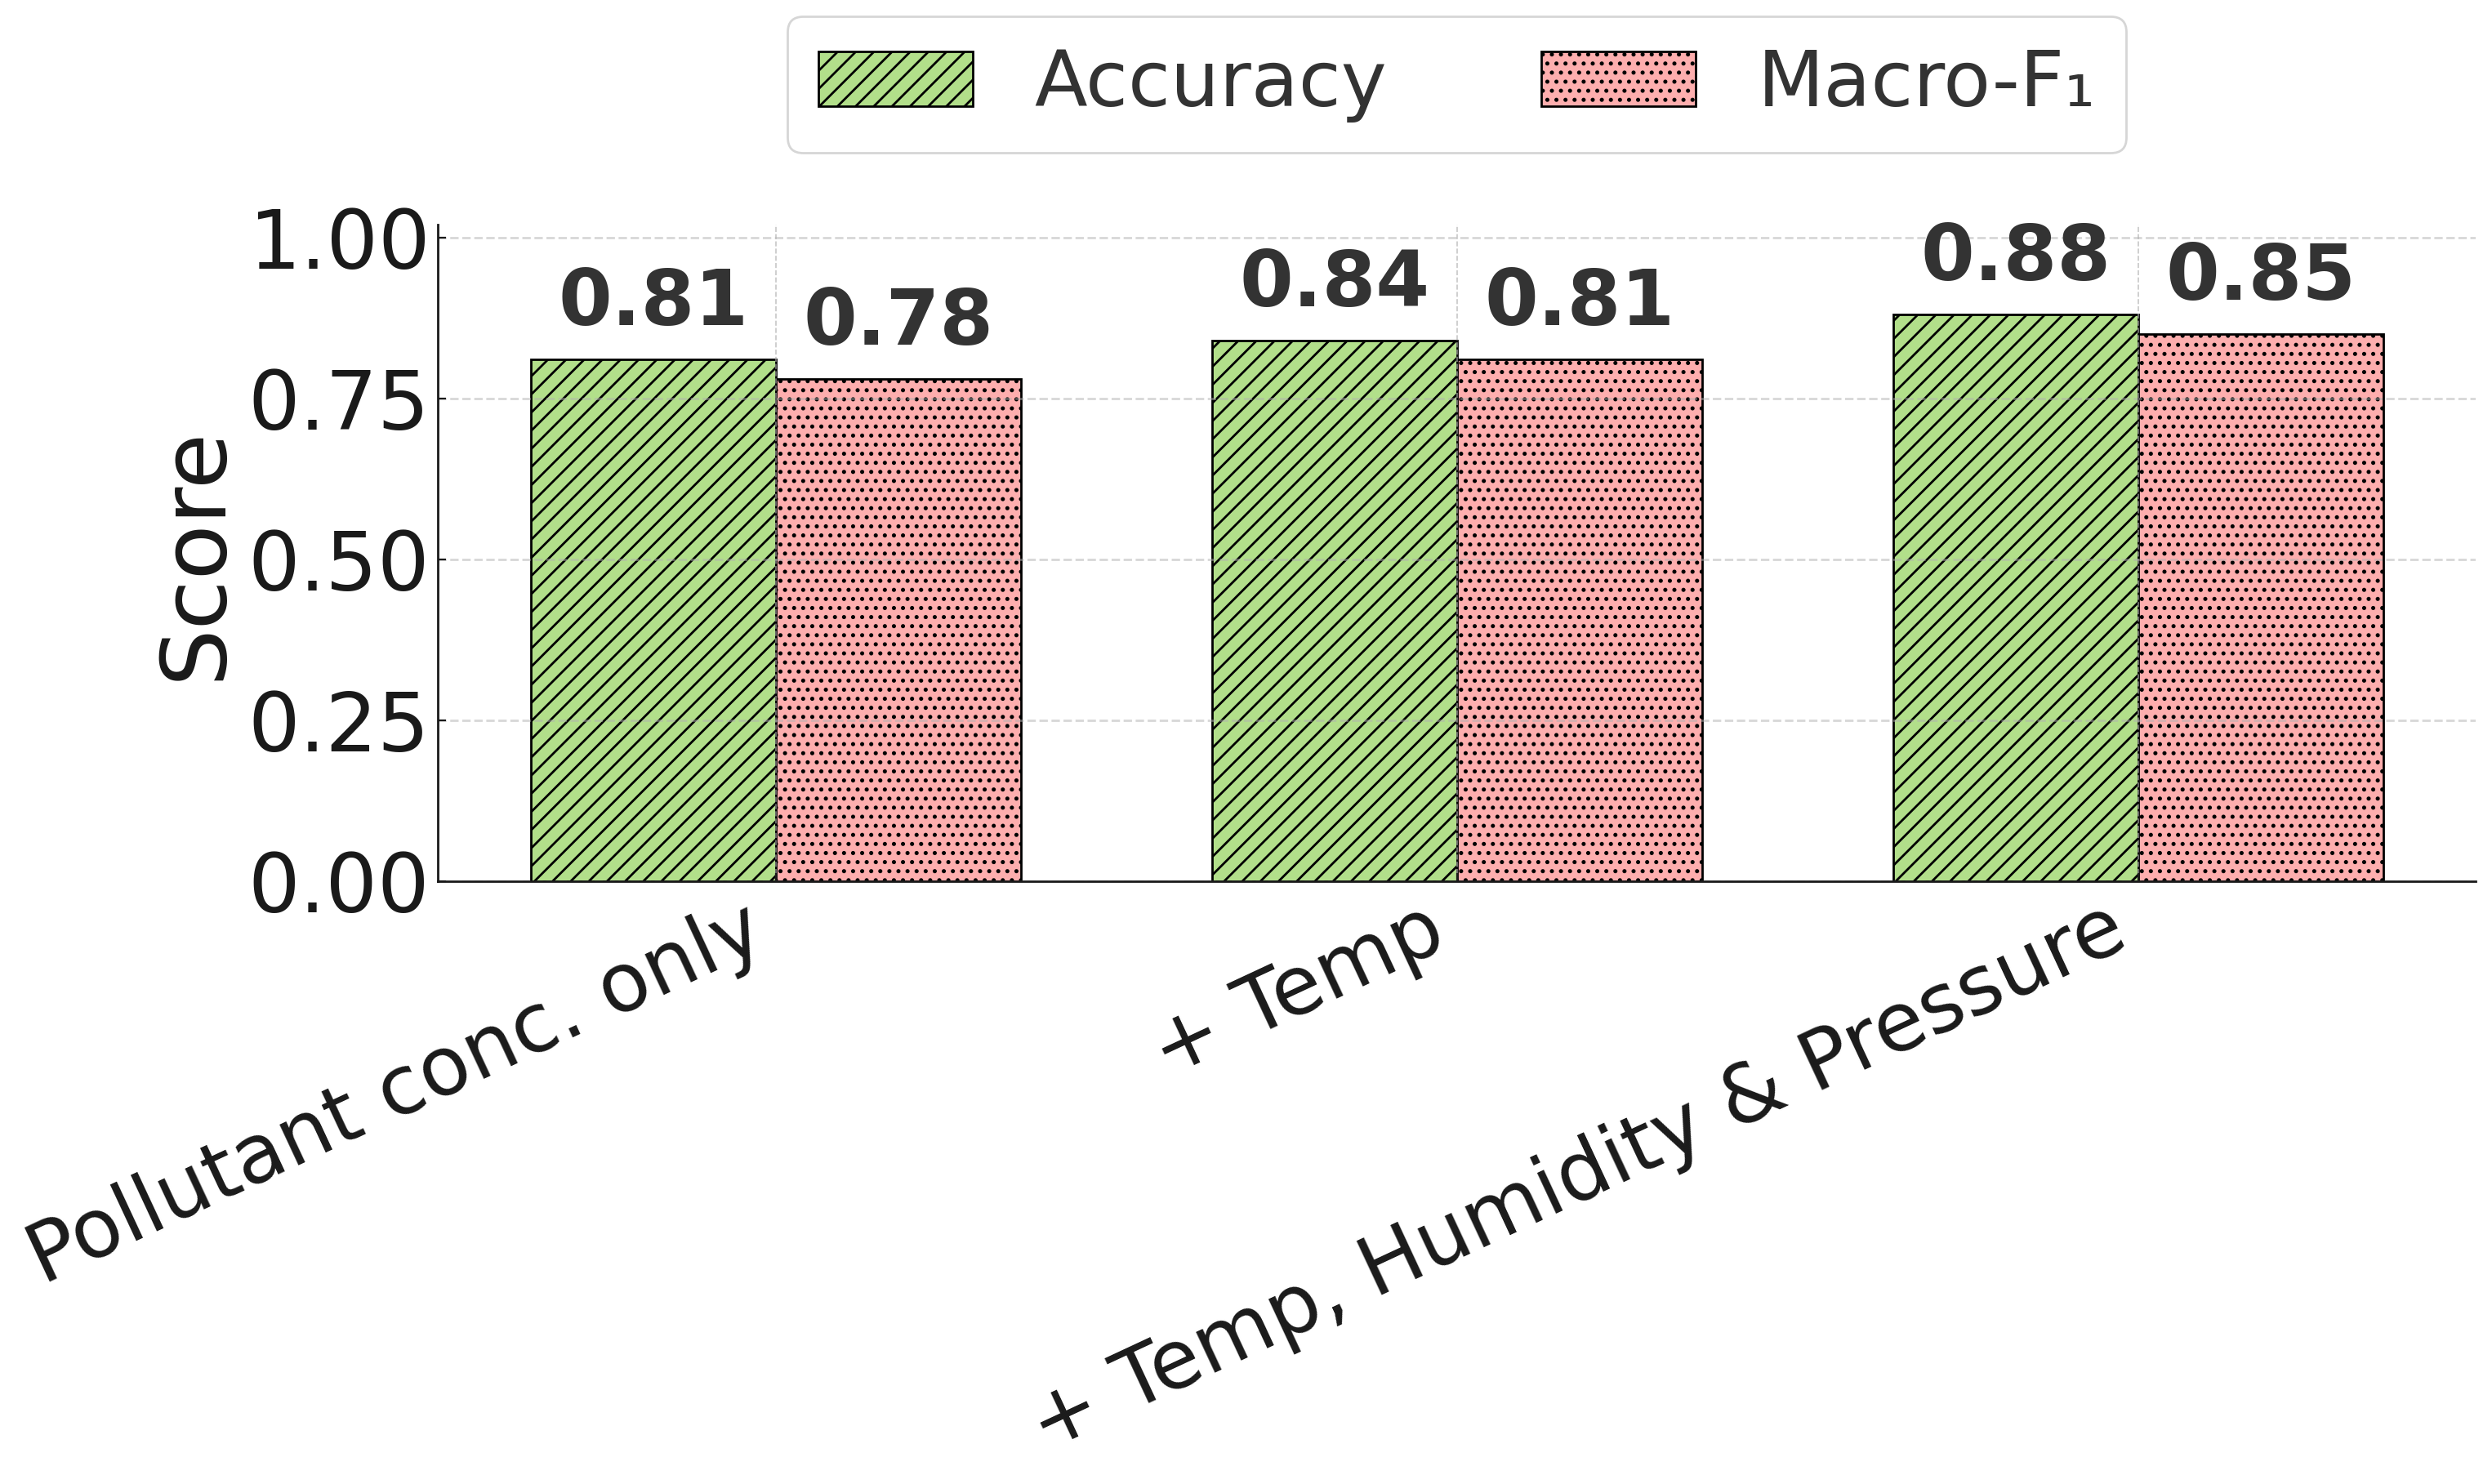

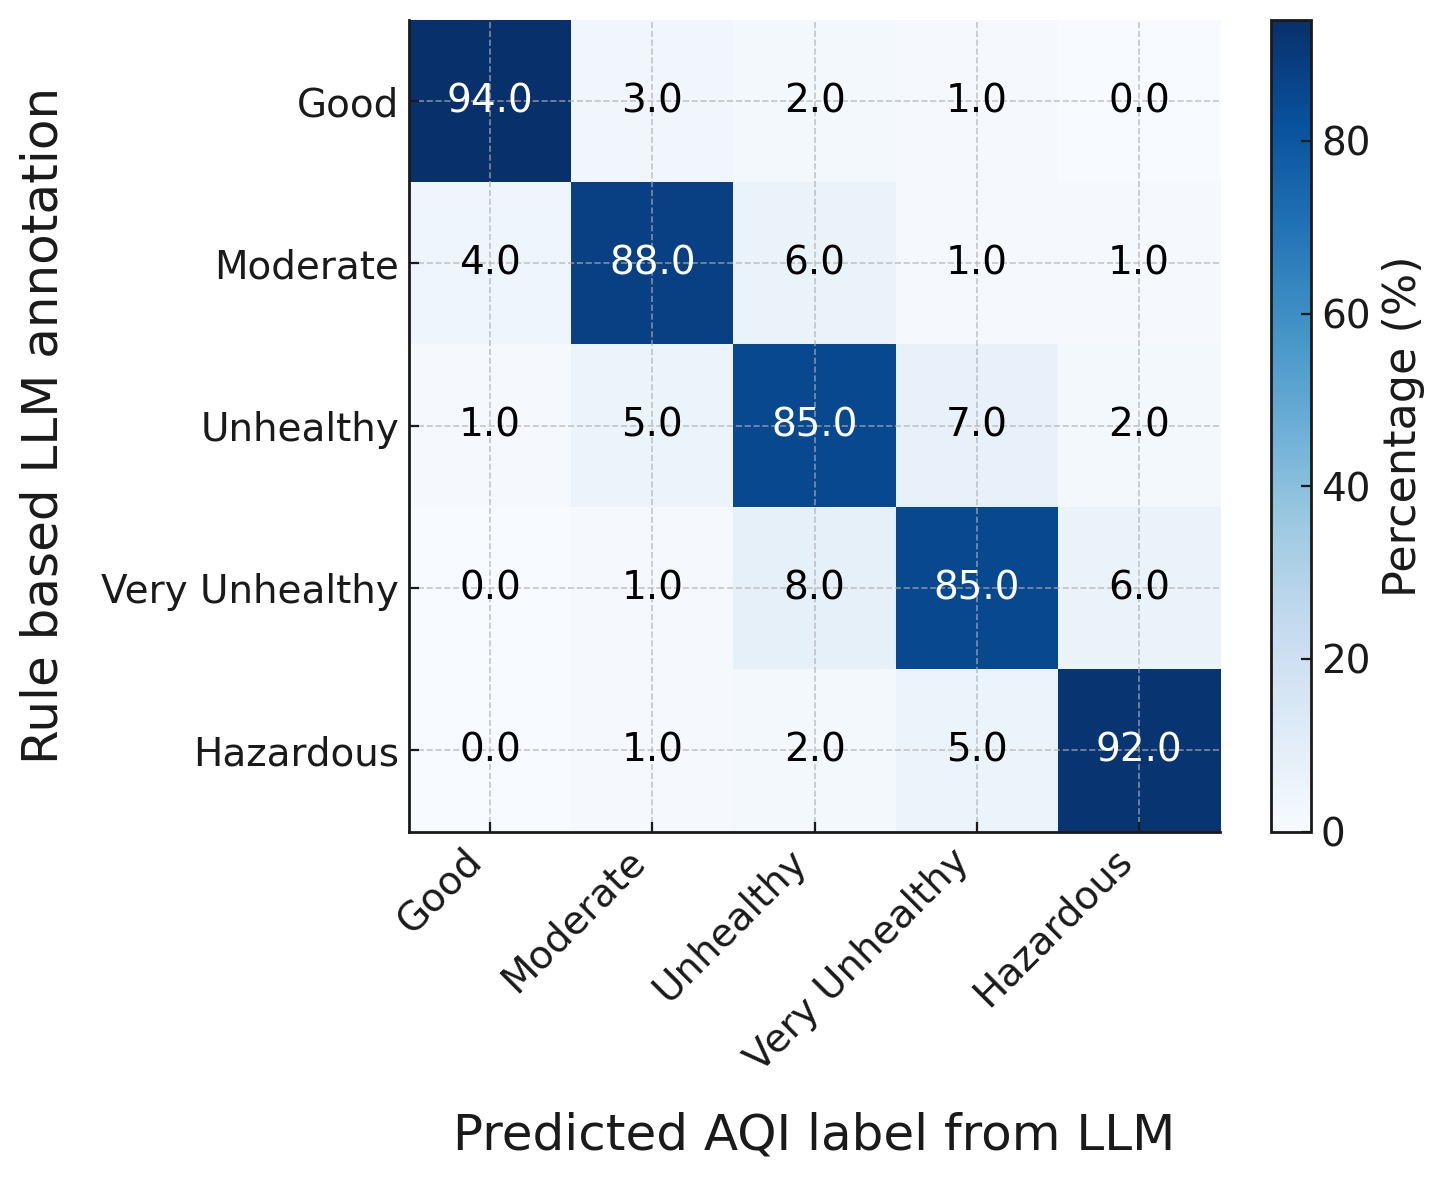

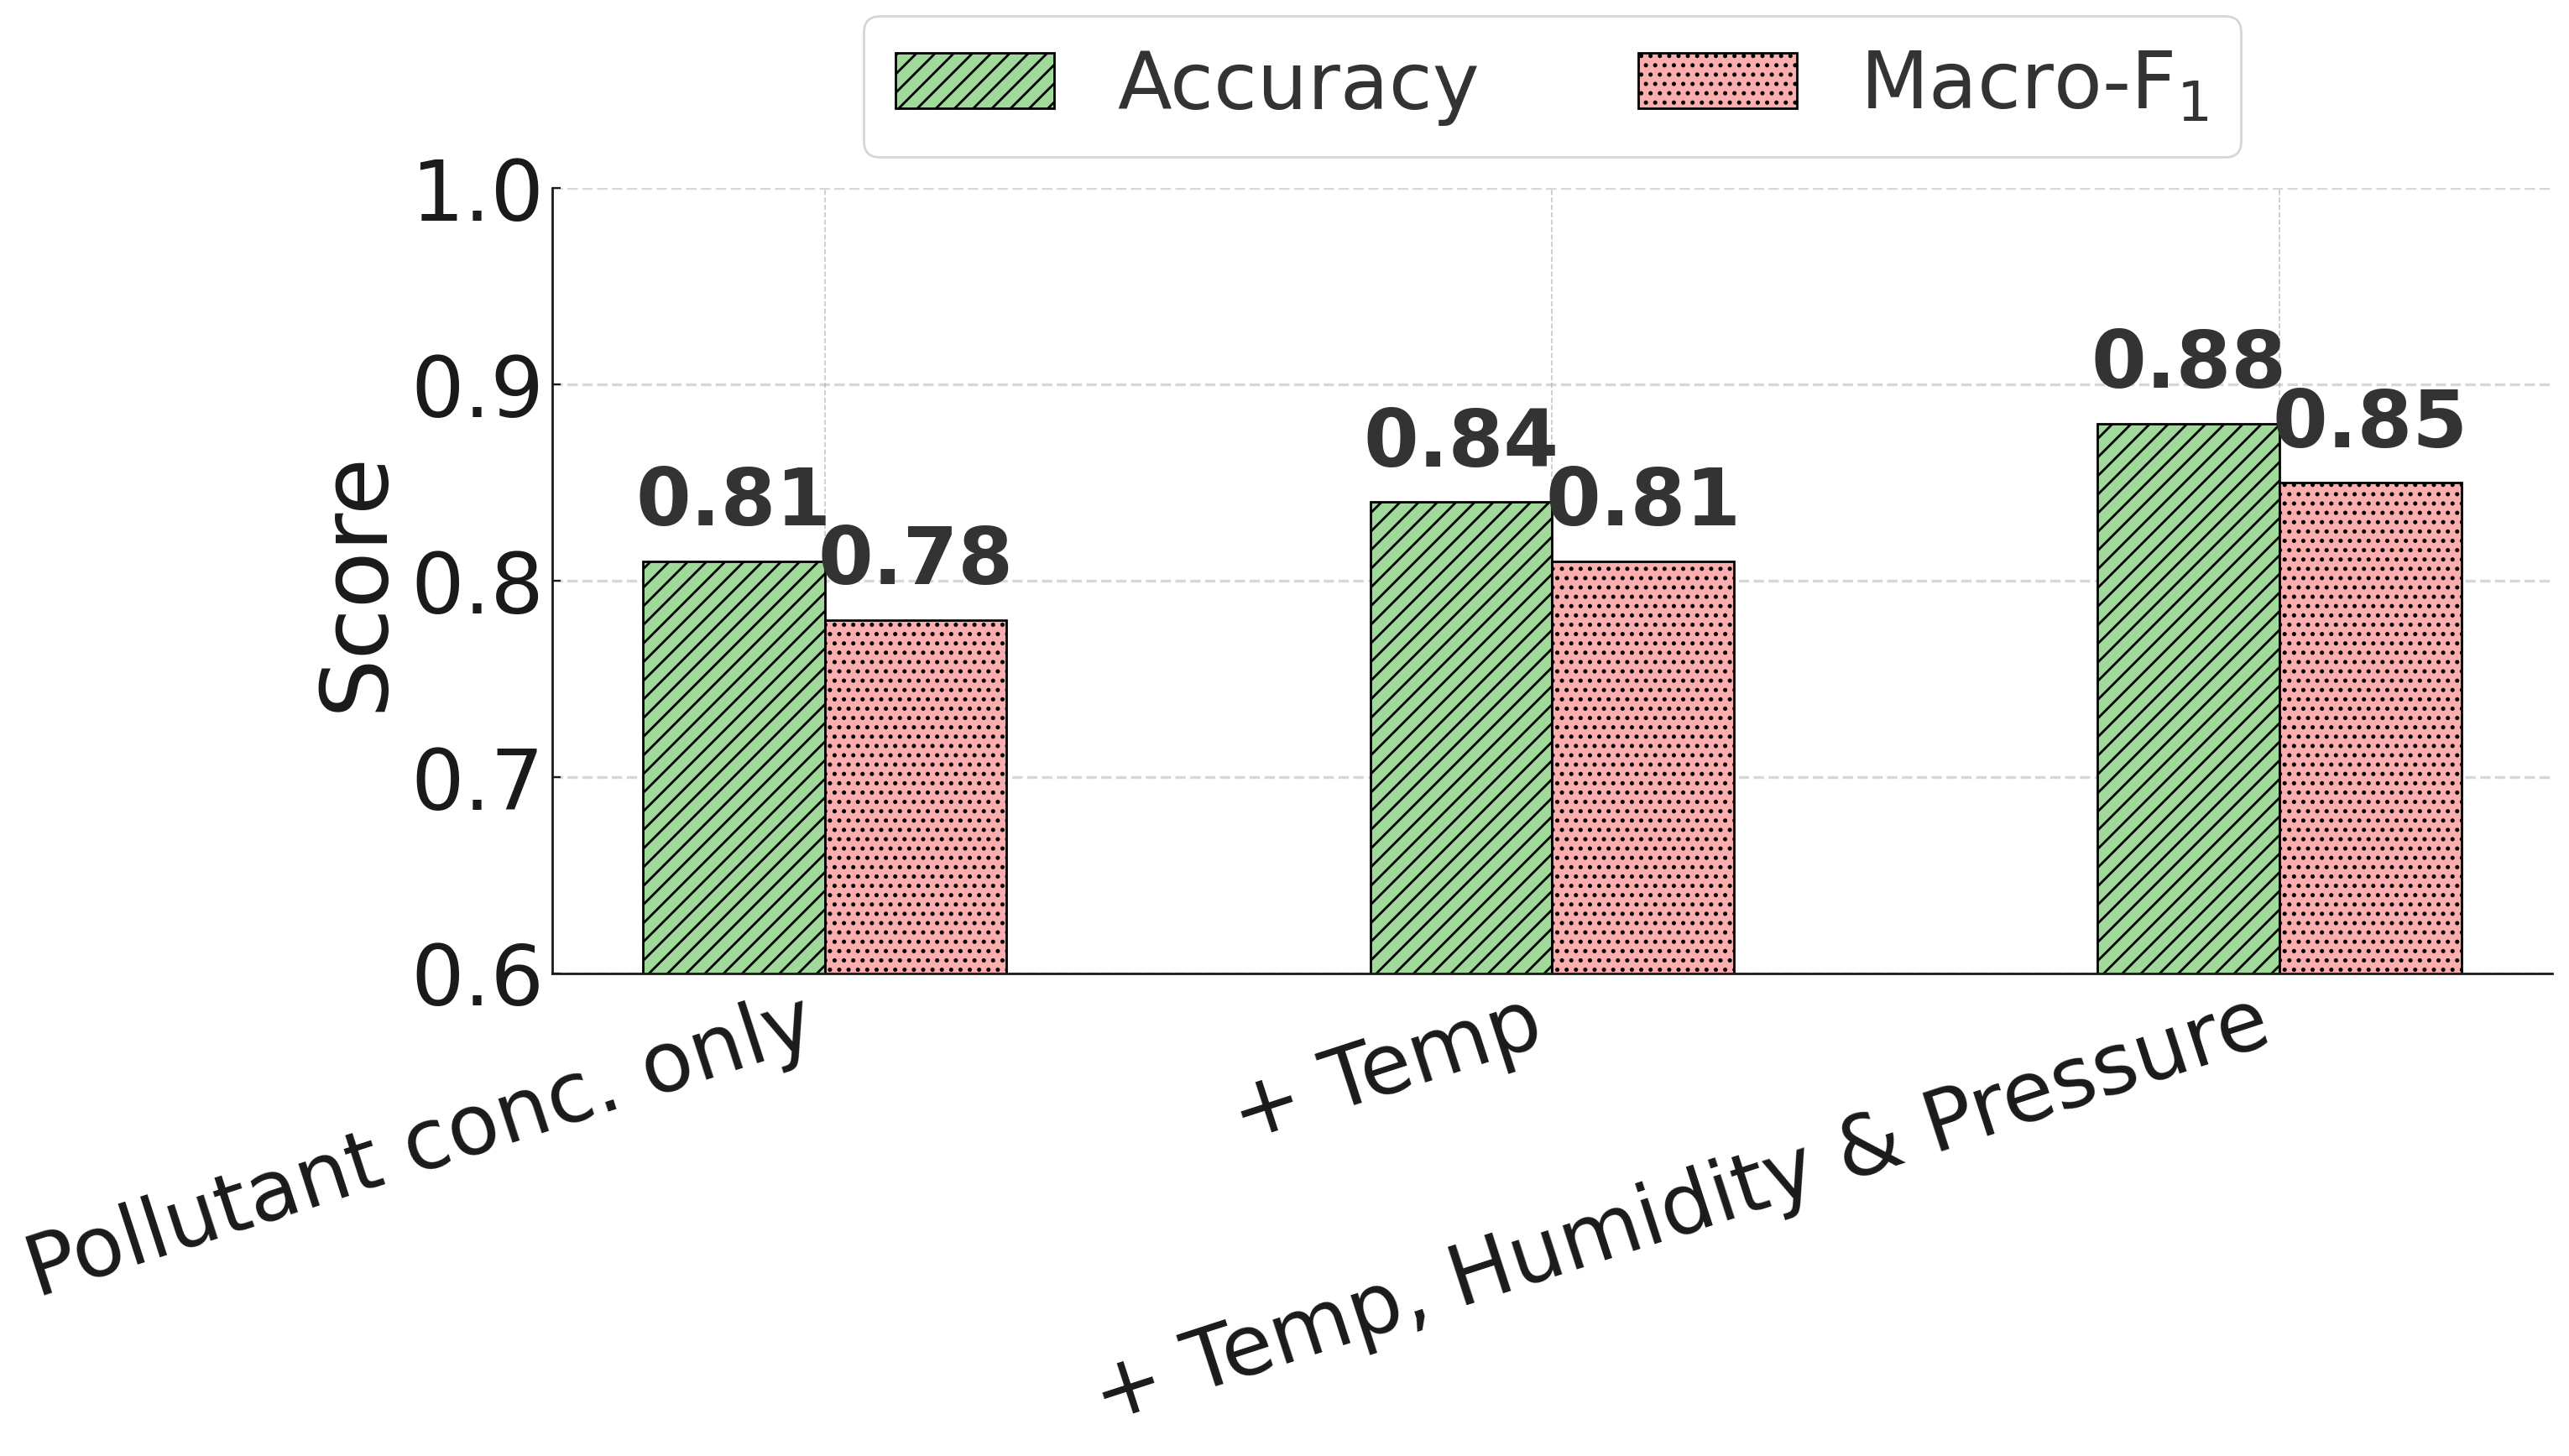

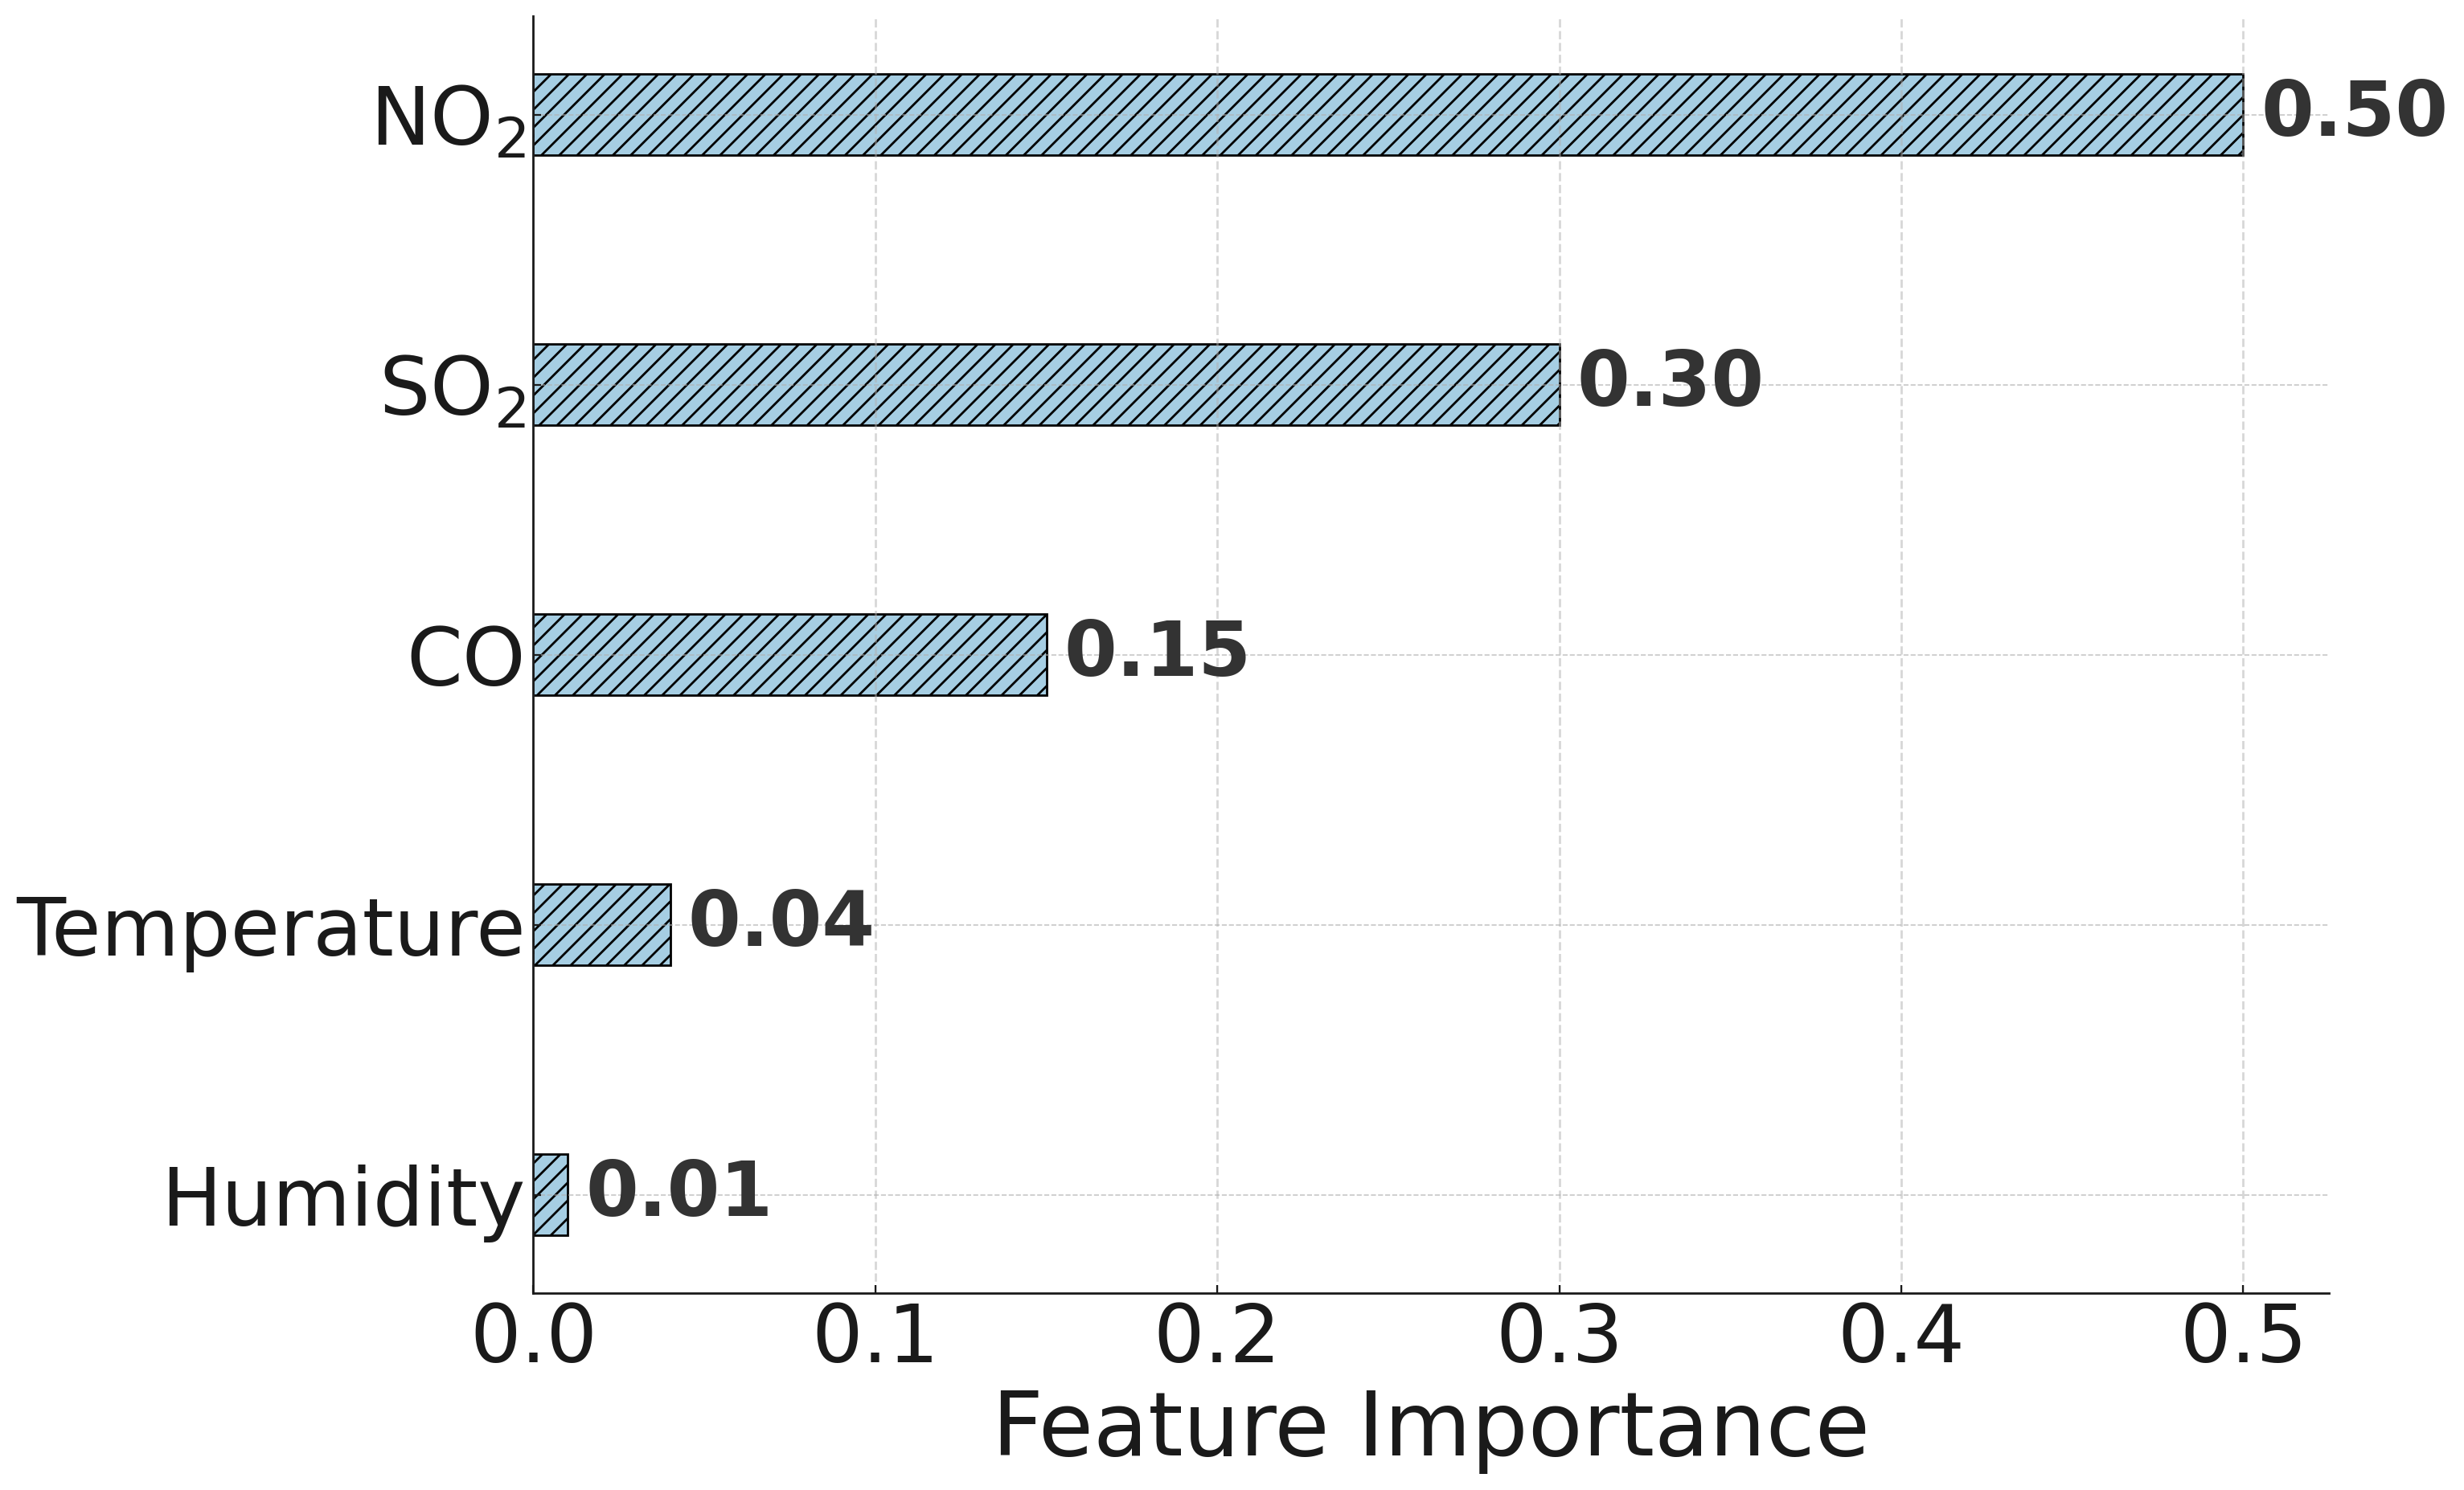

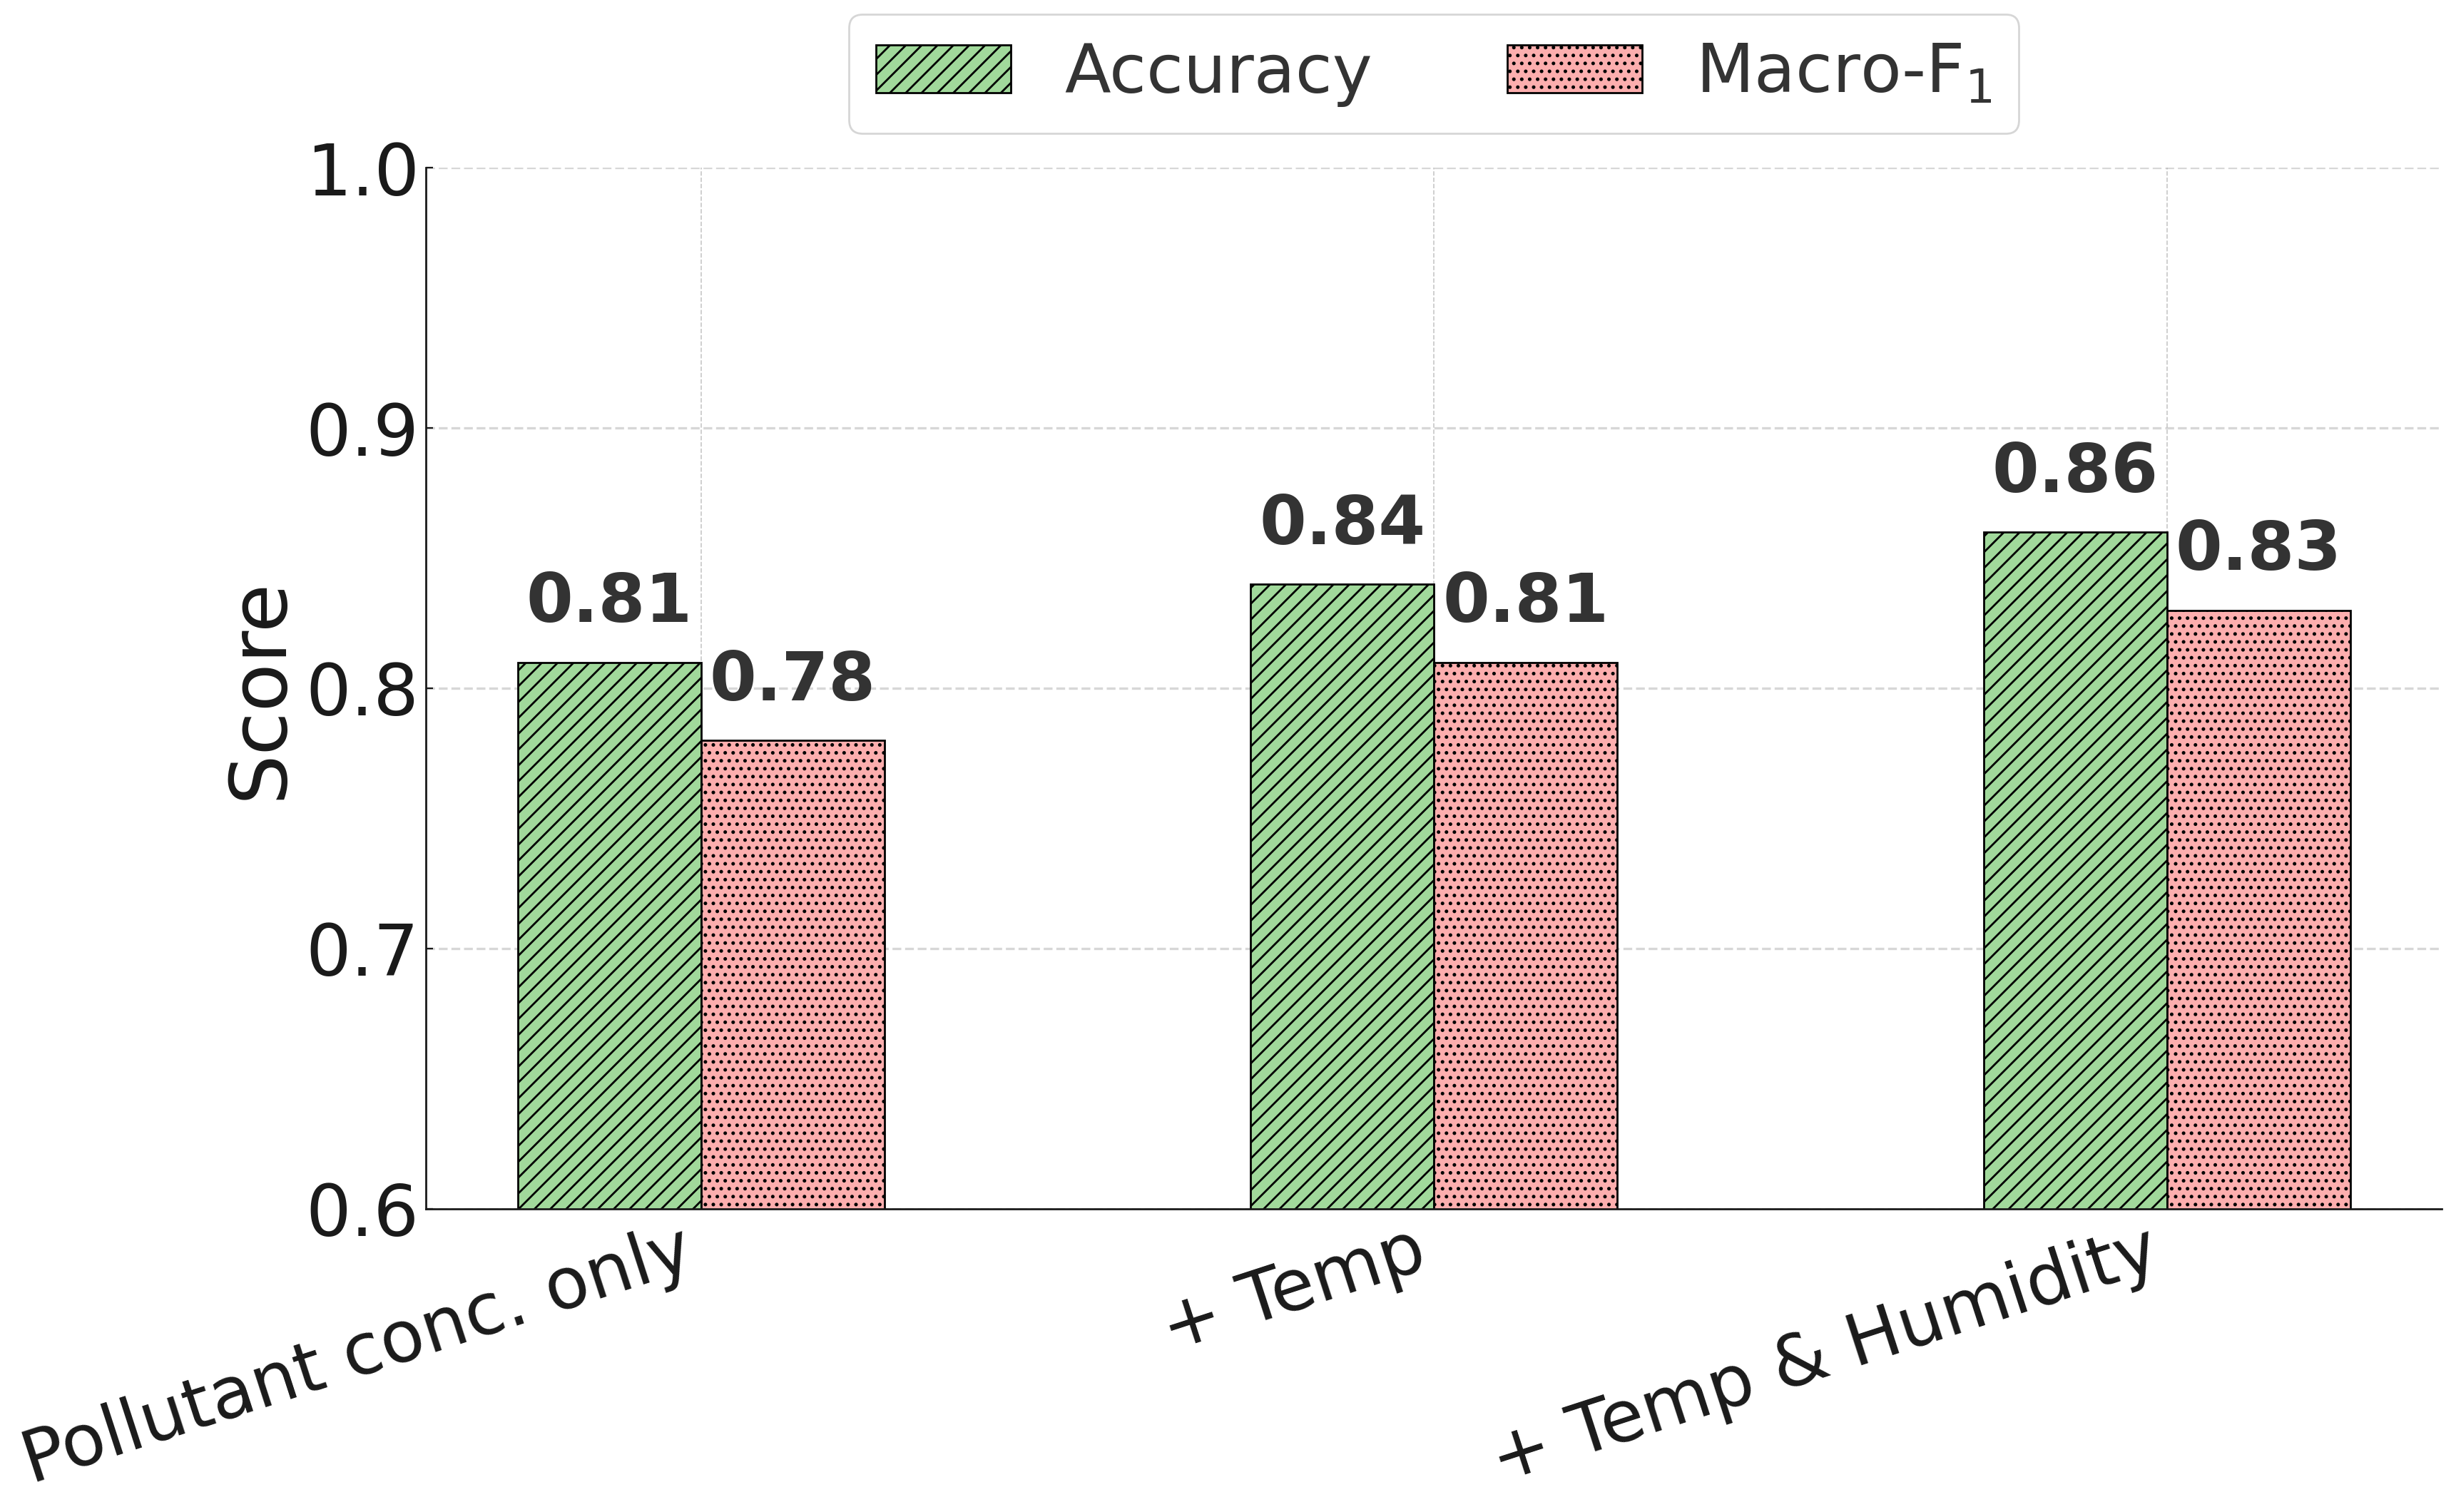

In [8]:
from IPython.display import Image, display

# Accuracy and Macro-F1 comparison
display(Image(filename="../figures/envFinal.png"))

# Confusion matrix (rule-based vs LLM)
display(Image(filename="../figures/confusion_matrix.png"))

# Accuracy with additional features
display(Image(filename="../figures/envFinal2.png"))

# Feature importance (horizontal layout)
display(Image(filename="../figures/FeatureFinal.png"))

# Accuracy and Macro-F1 comparison (Pollutant conc. only vs +Temp vs +Temp & Humidity)
Image(filename="../figures/Chech.png")

### Summary of Visualizations  

The final figures included in this notebook illustrate the insights derived from our **aggregated AoT sensor data** and the downstream analysis. Each plot captures a different perspective of how environmental features influence air quality labeling and how sensor reliability is interpreted:  

- **Performance Comparisons (Accuracy & Macro-F1):**  
  Several bar charts (e.g., *Chech.png*, *envFinal.png*, *envFinal2.png*) compare classification models built on different feature sets. Starting from pollutant concentrations alone and progressively adding meteorological variables such as temperature, humidity, and pressure, we observe a consistent improvement in both accuracy and macro-F1. This highlights the importance of environmental context in strengthening air quality predictions.  

- **Confusion Matrix (confusion_matrix.png):**  
  The confusion matrix compares AQI category annotations from a rule-based LLM approach with predictions made by our learned models. The high diagonal values (85–94%) indicate strong agreement, validating that the annotated labels are consistent with predictive modeling outcomes.  

- **Feature Importance (FeatureFinal.png, FeatureImportance.png):**  
  Feature importance plots rank individual pollutants (NO₂, SO₂, CO) and meteorological signals (temperature, humidity). As expected, pollutants dominate predictive power, but temperature and humidity still contribute marginally. These results reinforce the observation that pollutants remain primary drivers of AQI classification, while environmental covariates serve as secondary refinements.  

- **Waggle Example Figures (example.png):**  
  To demonstrate the utility of Waggle’s built-in visualization tools, we include an example plot generated via the `gen_custom_plots.py` script. These line charts show time-series measurements (e.g., temperature or humidity) across multiple sensors and locations, highlighting temporal variation and cross-sensor consistency. While these example plots are not the main basis for our research conclusions, they illustrate the raw diagnostic capabilities of the Waggle stack.  


---

### How the Figures Were Generated  

We followed a **two-stage process** for visualization:  

1. **Automated Plotting Tools (Waggle utilities):**  
   The Waggle ecosystem provides plotting scripts such as `gen_custom_plots.py`, `gen_tables.py`, and `create_project_graphs.sh`. These scripts allow quick visualization of raw or aggregated traces. In our workflow, they were particularly useful for generating diagnostic plots and sanity-checking data quality across nodes.  

2. **Custom Post-processing & Refinement:**  
   For the figures shown here, we relied on Waggle’s plotting outputs as a foundation but then **refined and reformatted** them to match research paper standards. This included adjusting color palettes, improving axis readability, and integrating accuracy/F1 overlays. Final versions of the figures (*envFinal.png*, *Chech.png*, *FeatureFinal.png*, etc.) were prepared in collaboration with our PhD mentor to ensure they conveyed the intended insights with clarity.  

Together, this combination of **Waggle’s automated tools** and **curated, research-ready visualizations** allowed us to present figures that are both reproducible and publication-quality, even if the exact plotting scripts are not directly embedded in this notebook.  